# CH-04 ËÆì AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ôÂèäË≥áÊñôË¶ñË¶∫Âåñ

## 4-1 ÊäÄË°ìÊåáÊ®ôÂÖ¨ÂºèÂ§™Ë§áÈõúÔºüËÆì AI Ëá™ÂãïÂåñË®àÁÆó

### 1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [1]:
!pip install openai
!pip install yfinance==0.2.38
from  openai import OpenAI, OpenAIError # ‰∏≤Êé• OpenAI API
import yfinance as yf
import pandas as pd # Ë≥áÊñôËôïÁêÜÂ•ó‰ª∂
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂

### 2Ô∏è‚É£ ÂèñÂæóËÇ°Á•®Ë≥áÊñô

In [2]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = "2330.tw"
# ÊäìÂèñÂçäÂπ¥Ë≥áÊñô
end = dt.date.today() # Ë≥áÊñôÁµêÊùüÊôÇÈñì
start = end - dt.timedelta(days=180) # Ë≥áÊñôÈñãÂßãÊôÇÈñì
df = yf.download(stock_id, start=start, end=end).reset_index()

print(df)

[*********************100%%**********************]  1 of 1 completed

          Date    Open    High     Low   Close    Adj Close    Volume
0   2024-08-20   977.0   977.0   968.0   973.0   964.972351  24039959
1   2024-08-21   961.0   964.0   956.0   958.0   950.096130  29758188
2   2024-08-22   958.0   964.0   948.0   951.0   943.153870  24349754
3   2024-08-23   944.0   952.0   939.0   949.0   941.170349  27592153
4   2024-08-26   957.0   961.0   945.0   950.0   942.162109  25057581
..         ...     ...     ...     ...     ...          ...       ...
111 2025-02-10  1125.0  1125.0  1095.0  1105.0  1105.000000  28527108
112 2025-02-11  1110.0  1115.0  1100.0  1110.0  1110.000000  18898928
113 2025-02-12  1110.0  1115.0  1100.0  1100.0  1100.000000  24172954
114 2025-02-13  1090.0  1095.0  1080.0  1090.0  1090.000000  33210403
115 2025-02-14  1065.0  1070.0  1060.0  1060.0  1060.000000  64486940

[116 rows x 7 columns]


### 3Ô∏è‚É£ Ëº∏ÂÖ• GEMINI API KEY

In [3]:
from google.colab import userdata

client = OpenAI(
    api_key=userdata.get('GEMINI_API_KEY'),
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

### 4Ô∏è‚É£ ÂâµÂª∫ Gemini 2.0 Flash Ê®°ÂûãÂáΩÂºè

In [4]:
def get_reply(messages):
  try:
    response = client.chat.completions.create(model="gemini-2.0-flash", messages=messages)
    reply = response.choices[0].message.content
  except OpenAIError as err:
    reply = f"ÁôºÁîü {err.type} ÈåØË™§\n{err.message}"
  return reply

# Ë®≠ÂÆö AI ËßíËâ≤, ‰ΩøÂÖ∂‰æùÊìö‰ΩøÁî®ËÄÖÈúÄÊ±ÇÈÄ≤Ë°å df ËôïÁêÜ
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### ËÆì AI Ëá™ÂãïÁîüÊàêÊäÄË°ìÊåáÊ®ôÁ®ãÂºèÁ¢º

### 5Ô∏è‚É£ Ë®àÁÆóÁßªÂãïÂπ≥ÂùáÁ∑ö

In [5]:
code_str = ai_helper(df, "Ë®àÁÆó8Êó•MAËàá13Êó•MA ")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df):
    """
    Calculates the 8-day and 13-day moving averages for the 'Close' price.

    Args:
        df (pd.DataFrame): A DataFrame with a 'Close' column.

    Returns:
        pd.DataFrame: The DataFrame with added 'MA8' and 'MA13' columns.
    """
    df['MA8'] = df['Close'].rolling(window=8).mean()
    df['MA13'] = df['Close'].rolling(window=13).mean()
    return df



Date    Open    High     Low   Close  Adj Close    Volume       MA8  \
111 2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108  1109.375   
112 2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928  1108.125   
113 2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954  1103.750   
114 2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403  1106.250   
115 2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940  1101.875   

            MA13  
111  1105.769231  
112  1107.307692  
113  1110.000000  
114  1108.846154  
115  1104.230769

### 6Ô∏è‚É£ Ë®àÁÆó MACD

In [6]:
code_str = ai_helper(df, "ÂÖàË®àÁÆó EMA ÂÜçË®àÁÆó MACD, Ê¨Ñ‰ΩçÂêçÁ®±Áî® MACD_Histogram ÂëΩÂêç")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df):
    """
    Calculates EMA and MACD, naming the histogram column 'MACD_Histogram'.

    Args:
        df (pd.DataFrame): DataFrame with columns 'Close'.

    Returns:
        pd.DataFrame: DataFrame with added 'MACD_Histogram' column.
    """

    # Calculate EMA12
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()

    # Calculate EMA26
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

    # Calculate MACD Line
    df['MACD'] = df['EMA12'] - df['EMA26']

    # Calculate Signal Line (EMA9 of MACD)
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate MACD Histogram
    df['MACD_Histogram'] = df['MACD'] - df['Signal']

    return df



Date    Open    High     Low   Close  Adj Close    Volume       MA8  \
111 2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108  1109.375   
112 2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928  1108.125   
113 2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954  1103.750   
114 2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403  1106.250   
115 2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940  1101.875   

            MA13        EMA12        EMA26      MACD     Signal  \
111  1105.769231  1106.737245  1097.339234  9.398011  10.055749   
112  1107.307692  1107.239207  1098.277068  8.962139   9.837027   
113  1110.000000  1106.125483  1098.404693  7.720790   9.413780   
114  1108.846154  1103.644639  1097.782123  5.862517   8.703527   
115  1104.230769  1096.930080  1094.983447  1.946632   7.352148   

     MACD_Histogram  
111       -0.657738  
112       -0.874888  
113       -1.692989  
114       -2.841010  
115       -5.405516

### 7Ô∏è‚É£ Ë®àÁÆó RSI

In [7]:
code_str = ai_helper(df, "Ë®àÁÆó RSI ")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df):
    """
    Calculates the Relative Strength Index (RSI) for a given dataframe.

    Args:
        df (pd.DataFrame): A dataframe containing the closing prices.
                           Must have a 'Close' column.

    Returns:
        pd.DataFrame: The dataframe with the RSI calculated and added as a new column 'RSI'.
    """
    delta = df['Close'].diff()
    delta = delta.dropna()

    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    roll_up1 = up.ewm(com=13, adjust=False).mean()
    roll_down1 = down.abs().ewm(com=13, adjust=False).mean()

    RS = roll_up1 / roll_down1
    RSI = 100.0 - (100.0 / (1.0 + RS))

    df['RSI'] = RSI.reindex(df.index)

    return df



Date    Open    High     Low   Close  Adj Close    Volume       MA8  \
111 2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108  1109.375   
112 2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928  1108.125   
113 2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954  1103.750   
114 2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403  1106.250   
115 2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940  1101.875   

            MA13        EMA12        EMA26      MACD     Signal  \
111  1105.769231  1106.737245  1097.339234  9.398011  10.055749   
112  1107.307692  1107.239207  1098.277068  8.962139   9.837027   
113  1110.000000  1106.125483  1098.404693  7.720790   9.413780   
114  1108.846154  1103.644639  1097.782123  5.862517   8.703527   
115  1104.230769  1096.930080  1094.983447  1.946632   7.352148   

     MACD_Histogram        RSI  
111       -0.657738  51.879708  
112       -0.874888  52.943970  
113       -1.692989  50.536610  
114       -2.841010  48.177474  
115       -5.405516  41.863680

### 8Ô∏è‚É£ Ë®àÁÆóÂ∏ÉÊûóÈÄöÈÅì

In [9]:
code_str = ai_helper(df, "Ë´ãË®àÁÆó1.5ÂÄãÊ®ôÊ∫ñÂ∑ÆÁöÑÂ∏ÉÊûóÈÄöÈÅì, Ê¨Ñ‰Ωç‰ª• Upper_Band Âíå Lower_Band ÂëΩÂêç")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df):
    df['Upper_Band'] = df['MA13'] + 1.5 * df['Close'].rolling(window=20).std()
    df['Lower_Band'] = df['MA13'] - 1.5 * df['Close'].rolling(window=20).std()
    return df



Date    Open    High     Low   Close  Adj Close    Volume       MA8  \
111 2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108  1109.375   
112 2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928  1108.125   
113 2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954  1103.750   
114 2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403  1106.250   
115 2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940  1101.875   

            MA13        EMA12        EMA26      MACD     Signal  \
111  1105.769231  1106.737245  1097.339234  9.398011  10.055749   
112  1107.307692  1107.239207  1098.277068  8.962139   9.837027   
113  1110.000000  1106.125483  1098.404693  7.720790   9.413780   
114  1108.846154  1103.644639  1097.782123  5.862517   8.703527   
115  1104.230769  1096.930080  1094.983447  1.946632   7.352148   

     MACD_Histogram        RSI   Upper_Band   Lower_Band  
111       -0.657738  51.879708  1136.766631  1074.771831  
112       -0.874888  52.943970  1136.568318  1078.047067  
113       -1.692989  50.536610  1138.530628  1081.469372  
114       -2.841010  48.177474  1136.319526  1081.372782  
115       -5.405516  41.863680  1135.192333  1073.269206

### 9Ô∏è‚É£ ËÉΩÈáèÊΩÆÊåáÊ®ô (On-Balance Volumem, OBV)

In [10]:
import numpy as np
code_str = ai_helper(df, "Ë®àÁÆó OBV ÊåáÊ®ô")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df):
    """
    Calculates the On Balance Volume (OBV) for a given dataframe.

    Args:
        df (pd.DataFrame): A Pandas DataFrame containing the OHLCV data.
                           Must include a 'Close' and 'Volume' column.

    Returns:
        pd.DataFrame: The input DataFrame with an additional 'OBV' column.
    """

    obv = [0]  # Initialize OBV list

    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i - 1]:
            obv.append(obv[-1] + df['Volume'][i])
        elif df['Close'][i] < df['Close'][i - 1]:
            obv.append(obv[-1] - df['Volume'][i])
        else:
            obv.append(obv[-1])

    df['OBV'] = obv
    return df



Date    Open    High     Low   Close  Adj Close    Volume       MA8  \
111 2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108  1109.375   
112 2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928  1108.125   
113 2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954  1103.750   
114 2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403  1106.250   
115 2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940  1101.875   

            MA13        EMA12        EMA26      MACD     Signal  \
111  1105.769231  1106.737245  1097.339234  9.398011  10.055749   
112  1107.307692  1107.239207  1098.277068  8.962139   9.837027   
113  1110.000000  1106.125483  1098.404693  7.720790   9.413780   
114  1108.846154  1103.644639  1097.782123  5.862517   8.703527   
115  1104.230769  1096.930080  1094.983447  1.946632   7.352148   

     MACD_Histogram        RSI   Upper_Band   Lower_Band        OBV  
111       -0.657738  51.879708  1136.766631  1074.771831  246492027  
112       -0.874888  52.943970  1136.568318  1078.047067  265390955  
113       -1.692989  50.536610  1138.530628  1081.469372  241218001  
114       -2.841010  48.177474  1136.319526  1081.372782  208007598  
115       -5.405516  41.863680  1135.192333  1073.269206  143520658

### ËÆì AI Ëá™ÂãïÁµ±Êï¥ Dataframe

### üîü Â∞áÊó•È†ªË≥áÊñôËΩâÊèõÊàêÊúàÈ†ªË≥áÊñô

In [12]:
code_str = ai_helper(df, "Ë´ãÂ∞áÊó•KÁ∑öÁöÑË≥áÊñôËΩâÊèõÊàêÊúàKÁ∑ö ")
code_str=code_str.replace('```','')
code_str=code_str.replace('python','')
print(code_str)
exec(code_str)
new_df = df
df_monthly = new_df
df_monthly = calculate(df_monthly)
df_monthly.tail()


import pandas as pd

def calculate(df):
    """
    Converts daily candlestick data to monthly candlestick data.

    Args:
        df (pd.DataFrame): DataFrame containing daily candlestick data
                           with columns: 'Date', 'Open', 'High', 'Low', 'Close',
                           'Adj Close', 'Volume', 'MA8', 'MA13', 'EMA12', 'EMA26',
                           'MACD', 'Signal', 'MACD_Histogram', 'RSI', 'Upper_Band',
                           'Lower_Band', 'OBV'.

    Returns:
        pd.DataFrame: DataFrame containing monthly candlestick data.
    """

    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    monthly_df = df.resample('M').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Adj Close': 'last',
        'Volume': 'sum',
        'MA8': 'last',
        'MA13': 'last',
        'EMA12': 'last',
        'EMA26': 'last',
        'MACD': 'last',
        'Signal': 'las

<string>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


Date    Open    High     Low   Close    Adj Close     Volume  \
2 2024-10-31   967.0  1100.0   967.0  1030.0  1026.057373  792908603   
3 2024-11-30   996.0  1090.0   992.0   996.0   992.187561  802504052   
4 2024-12-31  1020.0  1095.0  1015.0  1075.0  1075.000000  668020107   
5 2025-01-31  1070.0  1160.0  1055.0  1135.0  1135.000000  608468011   
6 2025-02-28  1065.0  1125.0  1060.0  1060.0  1060.000000  418790479   

        MA8         MA13        EMA12        EMA26       MACD     Signal  \
2  1058.125  1057.307692  1046.661458  1027.211168  19.450290  24.325360   
3  1014.500  1022.000000  1019.499323  1027.331526  -7.832203  -1.398636   
4  1077.500  1076.923077  1076.552385  1065.705201  10.847185  10.382734   
5  1103.750  1106.923077  1106.881171  1092.856214  14.024957  11.582220   
6  1101.875  1104.230769  1096.930080  1094.983447   1.946632   7.352148   

   MACD_Histogram        RSI   Upper_Band   Lower_Band        OBV  
2       -4.875070  49.460430  1112.441566  1002.173818  155753859  
3       -6.433568  40.235724  1060.723004   983.276996   -9760018  
4        0.464450  52.963862  1098.341143  1055.505011  102372721  
5        2.442737  61.483574  1139.521864  1074.324290  221417441  
6       -5.405516  41.863680  1135.192333  1073.269206  143520658

## 4-2 Ë≥áÊñôË¶ñË¶∫Âåñ

### 1Ô∏è‚É£1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [13]:
import matplotlib.pyplot as plt

### Áï´Âá∫Á∞°ÊòìËÇ°ÂÉπÂúñ

### 1Ô∏è‚É£2Ô∏è‚É£ ËÆìÊàëÂÄëÂÜç‰∏ÄÊ¨°Ê™¢Ë¶ñË≥áÊñôÊ†ºÂºèÂêßÔºÅ

In [14]:
new_df = new_df.reset_index() # ÈáçË®≠ index
new_df['Date'] = pd.to_datetime(new_df['Date']) # Â∞á Date ËΩâÊèõÁÇ∫ datetime È°ûÂà•
new_df.tail()

Date    Open    High     Low   Close  Adj Close    Volume       MA8  \
111 2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108  1109.375   
112 2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928  1108.125   
113 2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954  1103.750   
114 2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403  1106.250   
115 2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940  1101.875   

            MA13        EMA12        EMA26      MACD     Signal  \
111  1105.769231  1106.737245  1097.339234  9.398011  10.055749   
112  1107.307692  1107.239207  1098.277068  8.962139   9.837027   
113  1110.000000  1106.125483  1098.404693  7.720790   9.413780   
114  1108.846154  1103.644639  1097.782123  5.862517   8.703527   
115  1104.230769  1096.930080  1094.983447  1.946632   7.352148   

     MACD_Histogram        RSI   Upper_Band   Lower_Band        OBV  
111       -0.657738  51.879708  1136.766631  1074.771831  246492027  
112       -0.874888  52.943970  1136.568318  1078.047067  265390955  
113       -1.692989  50.536610  1138.530628  1081.469372  241218001  
114       -2.841010  48.177474  1136.319526  1081.372782  208007598  
115       -5.405516  41.863680  1135.192333  1073.269206  143520658

### 1Ô∏è‚É£3Ô∏è‚É£ ‰ΩøÁî® matplotlib Áï´Âá∫Êî∂Áõ§ÂÉπÁöÑÊäòÁ∑öÂúñ

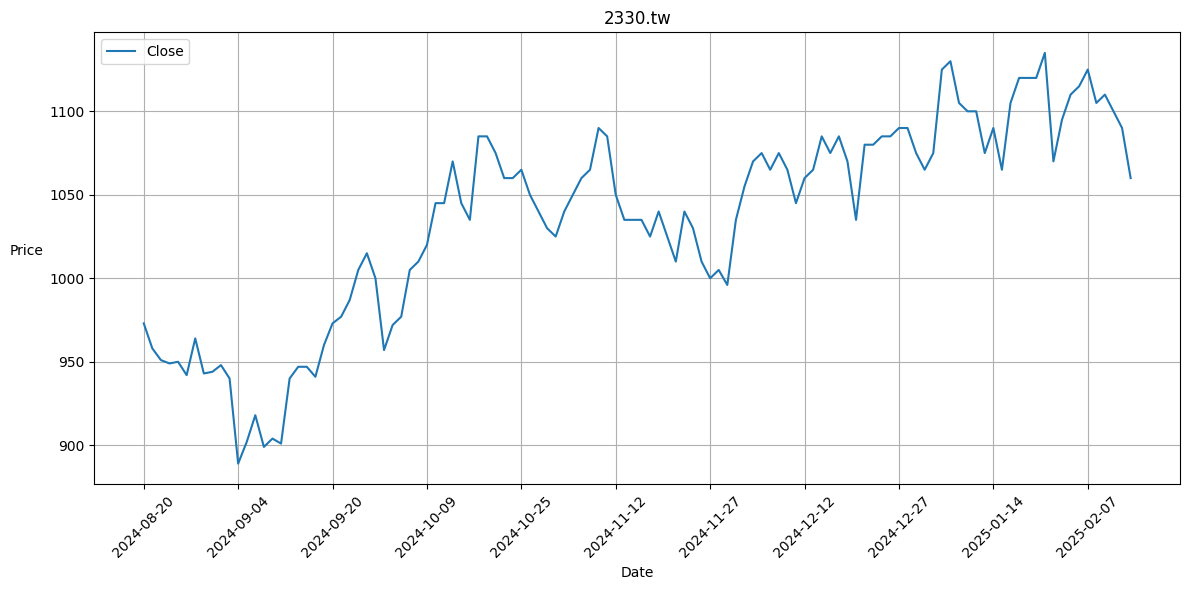

In [15]:
# Áï´Â∏ÉÂ∞∫ÂØ∏Â§ßÂ∞èË®≠ÂÆö
plt.figure(figsize=(12, 6))

# Ë®≠ÂÆöË¶ÅÁπ™Ë£ΩÁöÑË≥áÊñôÊ¨Ñ‰Ωç
plt.plot(new_df['Close'], label='Close')

# Ë®≠ÂÆö x Ëª∏ÁöÑÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# Ë®≠ÂÆöÂúñË°®ÁöÑÊ®ôÈ°åÔºåx Ëª∏Âíå y Ëª∏ÁöÑÊ®ôÁ±§
plt.title(f'{stock_id}')   # Â∞áËÇ°Á•®‰ª£ËôüË®≠ÁÇ∫ÂúñÊ®ô
plt.xlabel('Date')         # x Ëª∏Ê®ôÁ±§
plt.ylabel('Price', rotation=0, ha='right')  # y Ëª∏Ê®ôÁ±§
plt.legend(loc='upper left') # Âú®Â∑¶‰∏äËßíÈ°ØÁ§∫Âúñ‰æã
plt.grid(True) # Âú®Âúñ‰∏äÈ°ØÁ§∫Á∂≤Ê†º
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### 1Ô∏è‚É£4Ô∏è‚É£ Âä†ÂÖ•Êàê‰∫§Èáè

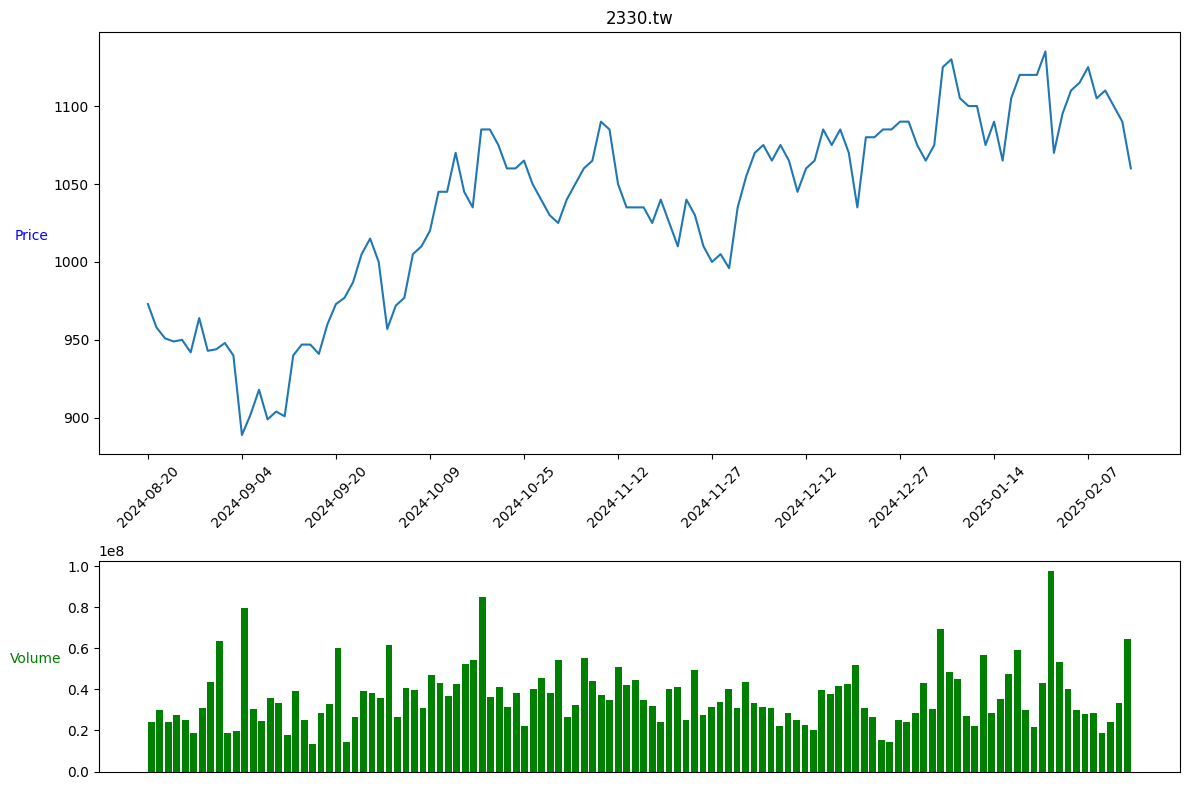

In [16]:
# ÂâµÂª∫ÂÖ©ÂºµÂ≠êÂúñ
fig, (ax1, ax2) = plt.subplots(2, 1,
                figsize=(12, 8),
                gridspec_kw={'height_ratios': [2, 1]})

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num], rotation=45)

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index, new_df['Volume'],  color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')
ax2.set_xticks([]) # ‰∏çÈ°ØÁ§∫Êó•ÊúüÊ®ôÁ±§
# Ëã•Ë¶ÅÈ°ØÁ§∫ÂúñË°®Ê®ôÁ±§ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ãÁ®ãÂºèÁ¢º
# ax2.set_xticks(date[::len(date)//num].index)
# ax2.set_xticklabels(date[::len(date)//num], rotation=45)

# ËÆìÂ≠êÂúñÂ°´ÂÖÖ„ÄÅÂ∞çÈΩä
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()


### 1Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

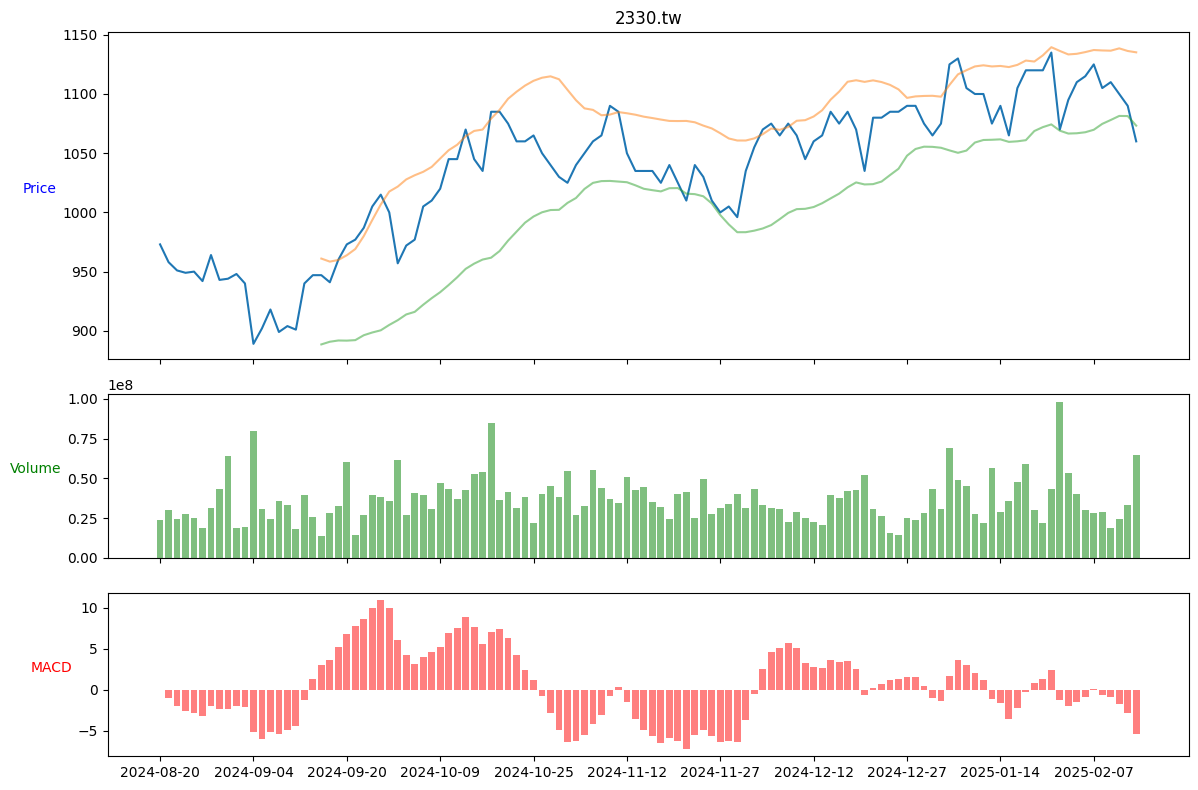

In [17]:
# ÂâµÂª∫‰∏âÂÄãÂ≠êÂúñ
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
# Âä†ÂÖ•Â∏ÉÊûóÈÄöÈÅì
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha Ë®≠ÂÆöÈÄèÊòéÂ∫¶
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index, new_df['Volume'], alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
ax3.bar(new_df.index, new_df['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# Ë™øÊï¥Â≠êÂúñÈñìÁöÑË∑ùÈõ¢
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### Áπ™Ë£Ω K Á∑öÂúñÔºömplfinance

### 1Ô∏è‚É£6Ô∏è‚É£ ÂåØÂÖ•ÊäÄË°ìÂàÜÊûêÁπ™ÂúñÂ•ó‰ª∂

In [18]:
!pip install mplfinance
import mplfinance as mpf

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


### 1Ô∏è‚É£7Ô∏è‚É£ ÈÅ∏ÊìáË≥áÊñôÊôÇÈñì

In [19]:
kplot_df = new_df.set_index('Date')
#kplot_df = kplot_df['2024-02-01':'2024-07-29']
kplot_df.tail()

Open    High     Low   Close  Adj Close    Volume       MA8  \
Date                                                                        
2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108  1109.375   
2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928  1108.125   
2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954  1103.750   
2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403  1106.250   
2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940  1101.875   

                   MA13        EMA12        EMA26      MACD     Signal  \
Date                                                                     
2025-02-10  1105.769231  1106.737245  1097.339234  9.398011  10.055749   
2025-02-11  1107.307692  1107.239207  1098.277068  8.962139   9.837027   
2025-02-12  1110.000000  1106.125483  1098.404693  7.720790   9.413780   
2025-02-13  1108.846154  1103.644639  1097.782123  5.862517   8.703527   
2025-02-14  1104.230769  1096.930080  1094.983447  1.946632   7.352148   

            MACD_Histogram        RSI   Upper_Band   Lower_Band        OBV  
Date                                                                        
2025-02-10       -0.657738  51.879708  1136.766631  1074.771831  246492027  
2025-02-11       -0.874888  52.943970  1136.568318  1078.047067  265390955  
2025-02-12       -1.692989  50.536610  1138.530628  1081.469372  241218001  
2025-02-13       -2.841010  48.177474  1136.319526  1081.372782  208007598  
2025-02-14       -5.405516  41.863680  1135.192333  1073.269206  143520658

### 1Ô∏è‚É£8Ô∏è‚É£ Áî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ

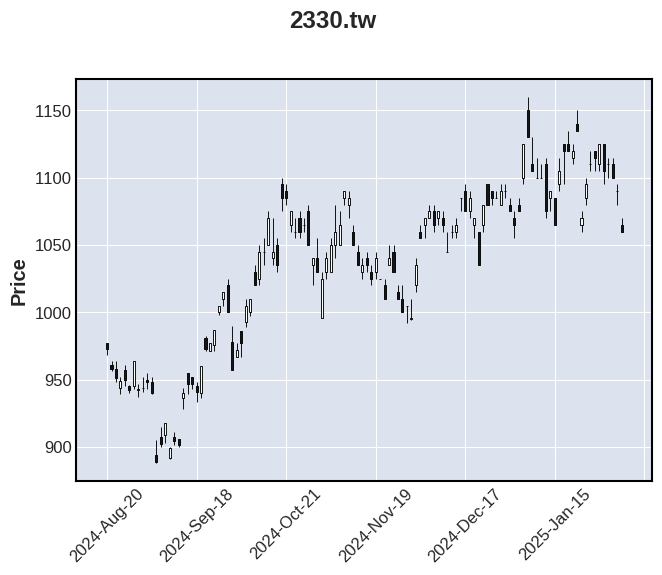

In [20]:
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 1Ô∏è‚É£9Ô∏è‚É£ Âä†ÂÖ•Áπ™ÂúñË®≠ÂÆö

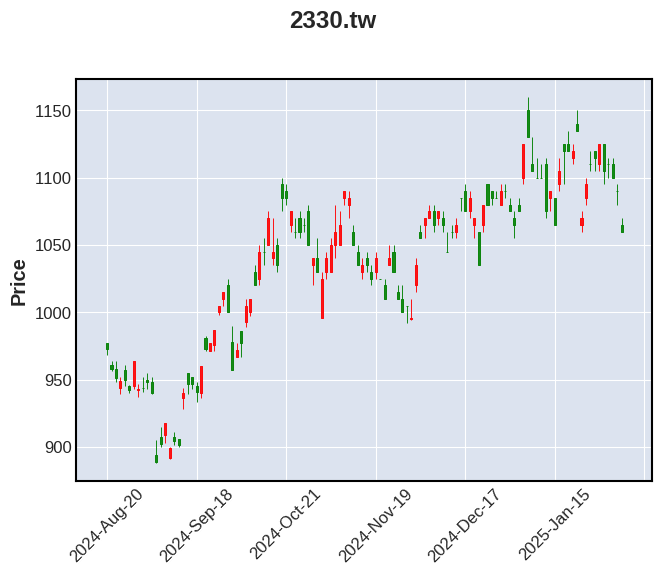

In [21]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}')

### 2Ô∏è‚É£0Ô∏è‚É£ Âä†ÂÖ•Â≠êÂúñ

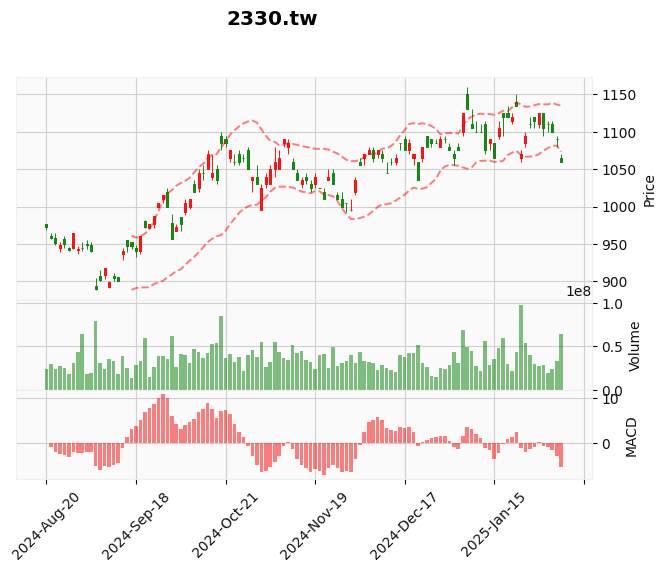

In [22]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# ‰∫§ÊòìÈáèÂíåÊäÄË°ìÊåáÊ®ôÂ≠êÂúñ
ap = [
    # ‰∏äËªåÁ∑ö
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # ‰∏ãËªåÁ∑ö
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # Êàê‰∫§Èáè
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 4-3 plotly ‰∫íÂãïÂºèÂúñË°®

### 2Ô∏è‚É£1Ô∏è‚É£ Ê™¢Ë¶ñË≥áÊñô

In [23]:
bk_df = new_df
bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')
bk_df.tail()

Date    Open    High     Low   Close  Adj Close    Volume  \
Date                                                                         
2025-02-10 2025-02-10  1125.0  1125.0  1095.0  1105.0     1105.0  28527108   
2025-02-11 2025-02-11  1110.0  1115.0  1100.0  1110.0     1110.0  18898928   
2025-02-12 2025-02-12  1110.0  1115.0  1100.0  1100.0     1100.0  24172954   
2025-02-13 2025-02-13  1090.0  1095.0  1080.0  1090.0     1090.0  33210403   
2025-02-14 2025-02-14  1065.0  1070.0  1060.0  1060.0     1060.0  64486940   

                 MA8         MA13        EMA12        EMA26      MACD  \
Date                                                                    
2025-02-10  1109.375  1105.769231  1106.737245  1097.339234  9.398011   
2025-02-11  1108.125  1107.307692  1107.239207  1098.277068  8.962139   
2025-02-12  1103.750  1110.000000  1106.125483  1098.404693  7.720790   
2025-02-13  1106.250  1108.846154  1103.644639  1097.782123  5.862517   
2025-02-14  1101.875  1104.230769  1096.930080  1094.983447  1.946632   

               Signal  MACD_Histogram        RSI   Upper_Band   Lower_Band  \
Date                                                                         
2025-02-10  10.055749       -0.657738  51.879708  1136.766631  1074.771831   
2025-02-11   9.837027       -0.874888  52.943970  1136.568318  1078.047067   
2025-02-12   9.413780       -1.692989  50.536610  1138.530628  1081.469372   
2025-02-13   8.703527       -2.841010  48.177474  1136.319526  1081.372782   
2025-02-14   7.352148       -5.405516  41.863680  1135.192333  1073.269206   

                  OBV  
Date                   
2025-02-10  246492027  
2025-02-11  265390955  
2025-02-12  241218001  
2025-02-13  208007598  
2025-02-14  143520658

### 2Ô∏è‚É£2Ô∏è‚É£ ÂåØÂÖ• plotly Â•ó‰ª∂

In [24]:
import plotly.graph_objects as go

### 2Ô∏è‚É£3Ô∏è‚É£ Áπ™Ë£Ω‰∫íÂãïÂºè K Á∑öÂúñ

In [25]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# È°ØÁ§∫ÂúñË°®
fig.show()

### 2Ô∏è‚É£4Ô∏è‚É£ ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
Ëß£Ê±∫Áπ™Âúñ‰∏çÈÄ£Á∫åÂïèÈ°å

In [26]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
# ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
all_dates = pd.date_range(start=bk_df.index.min(),
              end=bk_df.index.max())
# ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)]
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

# È°ØÁ§∫ÂúñË°®
fig.show()

<ipython-input-26-11ede7c86549>:21: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏

In [27]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])


# ÂúñË°®Êõ¥Êñ∞-Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_layout(
    height=800,
    width=1200
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

<ipython-input-27-28d88b8e0393>:24: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£6Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

In [28]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red', decreasing_line_color='green',
            name = "K Á∑ö")])


# Â∏ÉÊûóÈÄöÈÅì
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Upper_Band'],mode='lines',
    line={'color': 'green','dash': 'dash'},name = "‰∏äËªåÁ∑ö"))
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Lower_Band'], mode='lines',
    line={'color': 'green', 'dash': 'dash'},name = "‰∏ãËªåÁ∑ö"))

# ‰∫§ÊòìÈáè
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['Volume'], marker={'color': 'green'},
      yaxis='y2', name = "‰∫§ÊòìÈáè"))

# MACD
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['MACD_Histogram'], marker={'color': 'red'},
      yaxis='y3', name = "MACD"))

# Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="toaxis")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")

# Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
fig.update_layout(
    height=800,
    yaxis={'domain': [0.35, 1]},
    yaxis2={'domain': [0.15, 0.3]},
    yaxis3={'domain': [0, 0.15]},
    title=f"{stock_id}",
    xaxis={
        # ÁØÑÂúçÈÅ∏ÊìáÊ†º
        'rangeselector': {
            'buttons': [
                {'count': 1, 'label': '1M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 6, 'label': '6M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 1, 'label': '1Y',
                  'step': 'year', 'stepmode': 'backward'},
                {'step': 'all'}
            ]
        },
        # ÁØÑÂúçÊªëÂãïÊ¢ù
        'rangeslider': {
            'visible': True,
            # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶ (Ë®≠ÁΩÆ 0.01 Â∞±ÊúÉËÆäÂñÆÁ¥îÁöÑ bar)
            'thickness': 0.01,
            'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
        },
        'type': 'date'
    }
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

<ipython-input-28-c4952c4d4546>:69: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£7Ô∏è‚É£ ÂØ´ÊàêÂáΩÂºè

In [29]:
# ‰∏ãËºâË≥áÊñô‰∏¶ËÆì AI Ë®àÁÆóÊåáÊ®ô
def download_stock_data(stock_id, start=None,
                        end=None, indicator='MACD'):
    stock_id = f"{stock_id}.tw"
    if not end:
        end = dt.date.today()
    if not start:
        start = end - dt.timedelta(days=365)
    # Âæû yf ‰∏ãËºâË≥áÊñô
    df = yf.download(stock_id, start=start, end=end).reset_index()

    # AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ô
    code_str = ai_helper(df, f"Ë®àÁÆó{indicator}")
    print(code_str)

    # Â∞á exec ÁîüÊàêÁöÑ calculate Ë®≠ÁÇ∫Â±ÄÈÉ®ËÆäÊï∏
    local_vars = {}
    exec(code_str, globals(), local_vars)
    calculate = local_vars['calculate']

    df = calculate(df)

    # Ë≥áÊñôËôïÁêÜ
    bk_df = df.reset_index()
    bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')

    return bk_df

# Áπ™Ë£ΩÂúñË°®ÂáΩÂºè
def create_stock_figure(stock_id, bk_df):

    # ÂâµÂª∫ K Á∑öÂúñ
    fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
                        open=bk_df['Open'],
                        high=bk_df['High'],
                        low=bk_df['Low'],
                        close=bk_df['Close'],
                        increasing_line_color='red',
                        decreasing_line_color='green',
                        name = "K Á∑ö")])

    # ‰∫§ÊòìÈáè
    fig.add_trace(go.Bar(x=bk_df.index, y=bk_df['Volume'],
                         marker={'color': 'green'}, yaxis='y2',
                           name = "‰∫§ÊòìÈáè"))

    # ÊâæÂá∫ÈúÄË¶ÅÁπ™Ë£ΩÁöÑÊ¨Ñ‰Ωç
    columns = bk_df.columns
    exclude_columns = ['index','Date', 'Open', 'High',
                        'Low', 'Close', 'Adj Close', 'Volume']
    remain_columns = [col for col in columns if
                       col not in exclude_columns]
    min_close = bk_df['Close'].min() - bk_df['Close'].std()
    max_close = bk_df['Close'].max() + bk_df['Close'].std()
    # Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
    for i in remain_columns:
      if min_close <= bk_df[i].mean() <= max_close:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', name=i))
      else:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', yaxis='y3', name=i))

    # Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
    fig.update_xaxes(showspikes=True, spikecolor="gray",
                    spikemode="toaxis")
    fig.update_yaxes(showspikes=True, spikecolor="gray",
                    spikemode="across")
    # Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
    fig.update_layout(
        height=800,
        width=1200,
        yaxis={'domain': [0.35, 1]},
        yaxis2={'domain': [0.15, 0.3]},
        # Ëã•Ë¶ÅÈáçÁñä y1 Âíå y3, ÂèØ‰ª•ÊîπÊàê
        # yaxis3=dict(overlaying='y', side='right')
        yaxis3={'domain': [0, 0.15]},
        title=f"{stock_id}",
        xaxis={
            # ÁØÑÂúçÈÅ∏ÊìáÊ†º
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1Y',
                      'step': 'year', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            # ÁØÑÂúçÊªëÂãïÊ¢ù
            'rangeslider': {
                'visible': True,
                'thickness': 0.01,  # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶
                'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
            },
            'type': 'date'
        }
    )

    # ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
    # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
    all_dates = pd.date_range(start=bk_df.index.min(),
                               end=bk_df.index.max())
    # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
    breaks = all_dates[~all_dates.isin(bk_df.index)]
    dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®Ê†ºÂºè
    fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

    return fig

# ‰∏ªÂáΩÂºè
def plotly_stock(stock_id, start=None, end=None, indicator='MACD'):

  df = download_stock_data(stock_id, start, end, indicator)
  fig = create_stock_figure(stock_id,df)
  fig.show()

### 2Ô∏è‚É£8Ô∏è‚É£ Âü∑Ë°åÂáΩÂºè

In [30]:
plotly_stock("2317", start='2022-01-01', end= None,
             indicator='Â∏ÉÊûóÈÄöÈÅìÂèäMACD')

[*********************100%%**********************]  1 of 1 completed



 import pandas as pd
 

 def calculate(df):
  # Calculate Moving Average
  df['MA20'] = df['Close'].rolling(window=20).mean()
 

  # Calculate Standard Deviation
  df['StdDev'] = df['Close'].rolling(window=20).std()
 

  # Calculate Upper and Lower Bollinger Bands
  df['Upper'] = df['MA20'] + 2 * df['StdDev']
  df['Lower'] = df['MA20'] - 2 * df['StdDev']
 

  # Calculate MACD
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
  df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
  df['MACD'] = df['EMA12'] - df['EMA26']
  df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
 

  return df
 


IndentationError: unexpected indent (<string>, line 2)